In [68]:
import csv 
import networkx as nx 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [71]:
df = pd.read_csv(r"C:\Users\hp\Desktop\modified.csv")

In [72]:
df.head(5)

,Drug,Gene,Drug Name,Gene Name
0,DB00357,P05108,Aminoglutethimide,CYP11A1
1,DB02721,P00325,4-Iodopyrazole,ADH1B
2,DB00773,P23219,Etoposide,PTGS1
3,DB07138,Q16539,Neflamapimod,MAPK14
4,DB07138,Q16539,Neflamapimod,MAPK14


In [101]:
_data_edge =nx.from_pandas_edgelist(df,source="Drug",target= "Gene")

In [102]:
print(nx.info(_data_edge))

Name: 
Type: Graph
Number of nodes: 7343
Number of edges: 15139
Average degree:   4.1234


In [98]:
list(_data_edge.neighbors('P07858'))

['DB03329',
 'DB02148',
 'DB04579',
 'DB07225',
 'DB02685',
 'DB07231',
 'DB07223',
 'DB03588',
 'DB07219',
 'DB02855',
 'DB07224',
 'DB04126',
 'DB07160',
 'DB02108']

In [100]:
# the first step friends of the node "P07858"
node = 'P07858'
nx.single_source_shortest_path_length(_data_edge, node, cutoff=1)

{'P07858': 0,
 'DB03588': 1,
 'DB02685': 1,
 'DB04579': 1,
 'DB02108': 1,
 'DB07231': 1,
 'DB03329': 1,
 'DB07225': 1,
 'DB07223': 1,
 'DB02855': 1,
 'DB07219': 1,
 'DB07160': 1,
 'DB07224': 1,
 'DB04126': 1,
 'DB02148': 1}

In [99]:
# the third step friends of the node "P07858"
node = 'P07858'
nx.single_source_shortest_path_length(_data_edge, node, cutoff=3)

{'P07858': 0,
 'DB03588': 1,
 'DB02685': 1,
 'DB04579': 1,
 'DB02108': 1,
 'DB07231': 1,
 'DB03329': 1,
 'DB07225': 1,
 'DB07223': 1,
 'DB02855': 1,
 'DB07219': 1,
 'DB07160': 1,
 'DB07224': 1,
 'DB04126': 1,
 'DB02148': 1,
 'P09668': 2,
 'DB08526': 3,
 'DB03120': 3,
 'DB02140': 3}

In [112]:
# the first step friends of "P02792"
node = 'P02792'
nx.single_source_shortest_path_length(_data_edge, node, cutoff=1)

{'P02792': 0, 'DB00893': 1, 'DB02285': 1}

In [113]:
# the third step friends of "P02792"
node = 'P02792'
nx.single_source_shortest_path_length(_data_edge, node, cutoff=3)

{'P02792': 0,
 'DB00893': 1,
 'DB02285': 1,
 'P69905': 2,
 'P02794': 2,
 'P68871': 2,
 'DB07428': 3,
 'DB00358': 3,
 'DB02126': 3,
 'DB08077': 3,
 'DB08486': 3,
 'DB07645': 3,
 'DB07427': 3,
 'DB08262': 3,
 'DB08632': 3}

In [154]:
# Topological Fingerprints 
## Fingerprinting and MOlecular Similarity 

from rdkit import DataStructs
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG

In [ ]:
# take the smiles form of the drugs
1. DB02285: CC1=C(C2=CC3=NC(=CC4=NC(=CC5=C(C(=C(N5)C=C1N2)C=C)C)C(=C4CCC(=O)O)C)C(=C3C)CCC(=O)O)C=C
3. DB07428: CC1=C(C=C(C=C1)OC)OCC2=CC=NC=C2

In [114]:
# comparing the similarity in sturctures between the first step friends and the third step friends of the node "P33681"
ms = [Chem.MolFromSmiles('CC1=C(C2=CC3=NC(=CC4=NC(=CC5=C(C(=C(N5)C=C1N2)C=C)C)C(=C4CCC(=O)O)C)C(=C3C)CCC(=O)O)C=C'), Chem.MolFromSmiles('CC1=C(C=C(C=C1)OC)OCC2=CC=NC=C2')]
fps = [Chem.RDKFingerprint(x) for x in ms]
DataStructs.FingerprintSimilarity(fps[0],fps[1])

0.15906288532675708

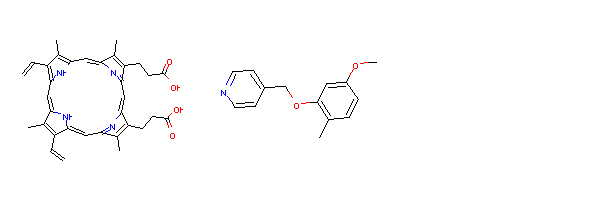

In [169]:
core = Chem.MolFromSmiles('CC1=C(C=C(C=C1)OC)OCC2=CC=NC=C2')
hal = [m.GetSubstructMatch(core)for m in ms]
img = Draw.MolsToGridImage(ms)
img